In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## The GSI's defense

In [39]:
scores = Table.read_table('scores_by_section.csv')

def average_score(section):
    return np.mean(section.column("Midterm"))

section_3_mean = average_score(scores.where("Section", are.equal_to(3)))

def simulate_average_under_null(section_size):
    random_section = scores.sample(section_size, with_replacement=False)
    return average_score(random_section)

def simulate_average_scores(section_size, num_simulations):
    sample_sizes = Table().with_columns(
        "Simulation #", np.arange(num_simulations),
        "Section size", np.repeat(section_size, num_simulations))
    samples = sample_sizes.with_columns(
        "Average score", sample_sizes.apply(simulate_average_under_null, "Section size"))
    return samples

def draw_test_statistic(stat, null_stats):
    null_stats.hist("Average score", bins=30)
    plots.axvline(stat, color="red")

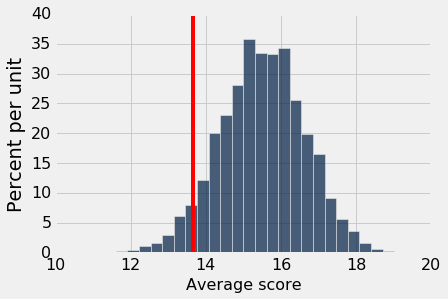

In [41]:
draw_test_statistic(section_3_mean, simulate_average_scores(27, 100000,))

In [42]:
other_sections = scores.where("Section", are.not_equal_to(3))
other_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
4,19
1,24
5,8
6,14
5,24


In [43]:
def simulate_average_under_alternative(section_size):
    random_section = other_sections.sample(section_size, with_replacement=False)
    lower_scores = random_section.column("Midterm") - 2
    return average_score(Table().with_columns("Midterm", lower_scores))

def simulate_average_scores_under_alternative(section_size, num_simulations):
    sample_sizes = Table().with_columns(
        "Simulation #", np.arange(num_simulations),
        "Section size", np.repeat(section_size, num_simulations))
    samples = sample_sizes.with_columns(
        "Average score", sample_sizes.apply(simulate_average_under_alternative, "Section size"))
    return samples


In [44]:
null_stats = simulate_average_scores(27, 100000)

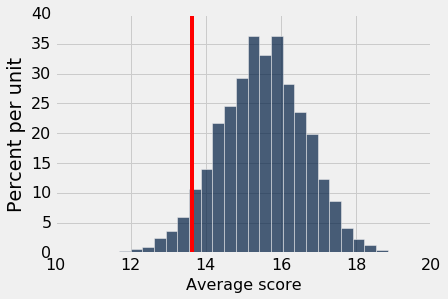

In [45]:
draw_test_statistic(simulate_average_under_alternative(27), null_stats)

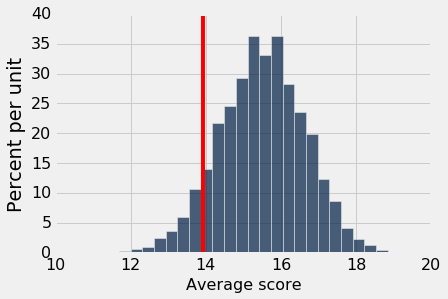

In [46]:
draw_test_statistic(simulate_average_under_alternative(27), null_stats)

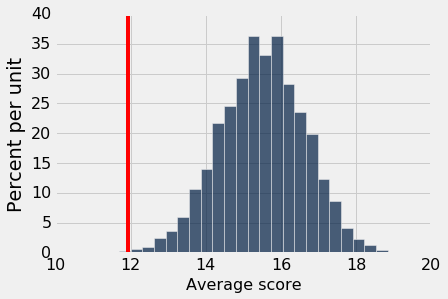

In [47]:
draw_test_statistic(simulate_average_under_alternative(27), null_stats)

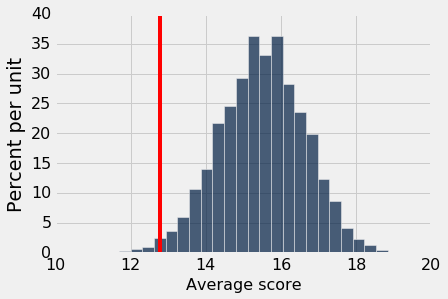

In [48]:
draw_test_statistic(simulate_average_under_alternative(27), null_stats)

## Jury selection

In [13]:
population = 16000
proportion_black = .26
num_black = int(population*proportion_black)
num_nonblack = population - num_black
# A table with 16000 rows, representing the population that was
# eligible for juries.
eligible = Table().with_columns(
    "Race", np.append(np.repeat("black", num_black), np.repeat("non-black", num_nonblack)))

# The test statistic:
def num_black(pool):
    """Given a table with a 'Race' column, returns the number of rows labeled 'black'."""
    return pool.where("Race", are.equal_to("black")).num_rows

# A function to simulate once under the null hypothesis:
def simulate_under_null(sample_size):
    return eligible.sample(sample_size, with_replacement=False)

# A function to simulate a jury pool once under the null hypothesis and then
# return the test statistic for that simulated jury pool.
def count_black_in_sample(sample_size):
    return num_black(simulate_under_null(sample_size))

# A function to run many simulations under the null hypothesis
# and return a table of the computed test statistics for each
# simulation:
def simulate_jury_pools(sample_size, num_simulations):
    sample_sizes = Table().with_columns(
        "Simulation #", np.arange(num_simulations),
        "Sample size", np.repeat(sample_size, num_simulations))
    samples = sample_sizes.with_columns(
        "Number black in sample",
        sample_sizes.apply(count_black_in_sample, "Sample size"))
    return samples

def simulate_and_draw_histogram(sample_size, num_simulations):
    simulate_jury_pools(sample_size, num_simulations).hist("Number black in sample", bins=np.arange(sample_size+1))

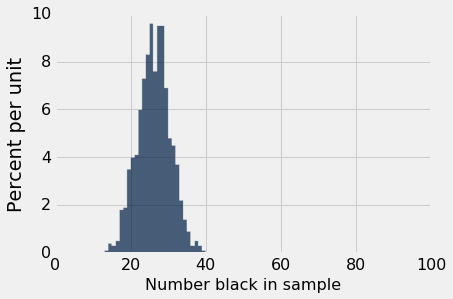

In [14]:
simulate_and_draw_histogram(100, 1000)

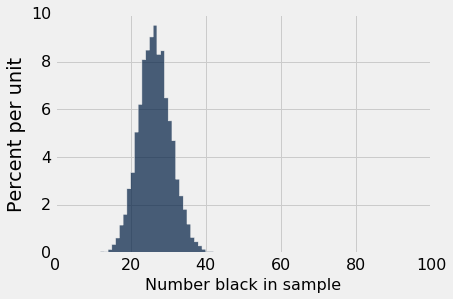

In [16]:
simulate_and_draw_histogram(100, 10000)

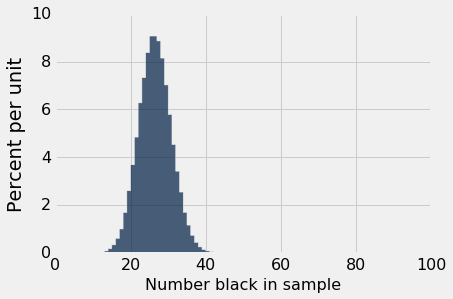

In [17]:
# Takes awhile to run!
simulate_and_draw_histogram(100, 100000)

In [52]:
# The actual number of samples:
import math
int(math.factorial(16000) / (math.factorial(16000-100)*math.factorial(100)))

20293425875484627786228822782713690479365125566150070500337534960168803942769172144412137756274107315577474552556260435283507404996929154915289079505724966796234442932398486147493984606256522000807656502541874864628633865023429937520850860694976120842276975935488

In [65]:
twenties = Table().with_columns("Number of heads", np.random.binomial(20, .5, size=100000))

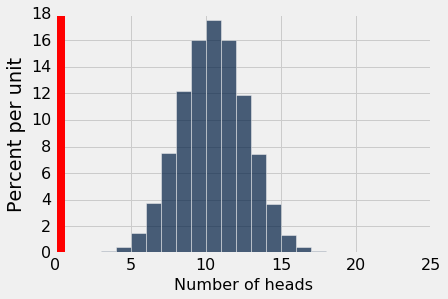

In [70]:
twenties.hist(bins=np.arange(22))
plots.axvline(0, color="red", lw=20);

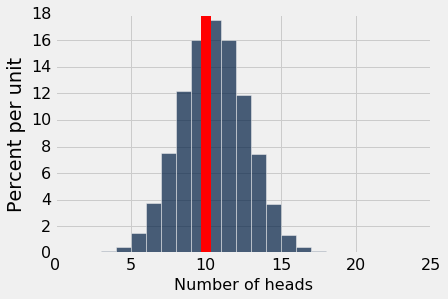

In [67]:
twenties.hist(bins=np.arange(22))
plots.axvline(10, color="red", lw=10);

In [68]:
ones = Table().with_columns("Number of heads", np.random.binomial(1, .5, size=100000))

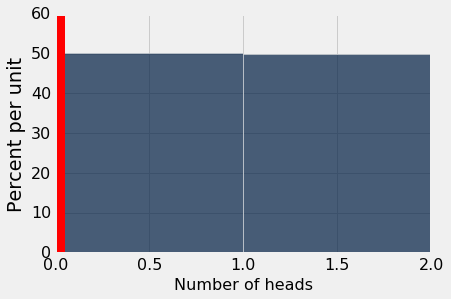

In [71]:
ones.hist(bins=np.arange(3))
plots.axvline(0, color='red', lw=20);

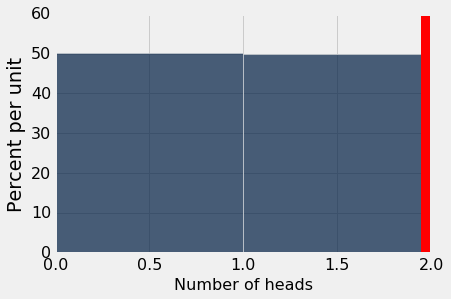

In [72]:
ones.hist(bins=np.arange(3))
plots.axvline(2, color='red', lw=20);